In [1]:
# Ⅰ. Hand Craft Model

In [3]:
from music21 import *

score = converter.parse('midi_data/a_Pirates of the Caribbean - He\'s a Pirate.mid')
print(score)

<music21.stream.Score 0x2210b6ca888>


In [5]:
# 피치 추출
pitches = []
for element in score.recurse().notes:
    if element.isNote:
        pitches.append(element.pitch)

print("Pitches:", pitches)

# 디셈벨(음량) 추출
decibels = []
for element in score.recurse().notes:
    if element.isNote:
        decibels.append(element.volume.velocity)

print("Decibels:", decibels)

# 음정의 speed 추출
speeds = []
for element in score.recurse().notes:
    if element.isNote:
        speeds.append(element.seconds)

print("Speeds:", speeds)

# 템포 추출
tempos = []
for element in score.recurse().getElementsByClass('MetronomeMark'):
    tempos.append(element.number)

print("Tempos:", tempos)

Pitches: [<music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch A3>, <music21.pitch.Pitch C4>, <music21.pitch.Pitch A3>, <music21.pitch.Pitch C4>, <music21.pitch.Pitch C4>, <music21.pitch.Pitch A3>, <music21.pitch.Pitch C4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch E4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch F4>, <m

In [37]:
# 피치 추출
pitches = []
for element in score.recurse().notes:
    if element.isNote:
        pitches.append(element.pitch)

print("Pitches:", pitches)

pitches2 = []
for element in score.parts[0].notes:
    print(element)
    if element.isNote:
        pitches2.append(element.pitch)


print("=======================")
print("Pitches:", pitches2)


Pitches: [<music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch A3>, <music21.pitch.Pitch C4>, <music21.pitch.Pitch A3>, <music21.pitch.Pitch C4>, <music21.pitch.Pitch C4>, <music21.pitch.Pitch A3>, <music21.pitch.Pitch C4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch E4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch D4>, <music21.pitch.Pitch F4>, <m

In [7]:
score.parts[0].recurse().notes

<music21.stream.iterator.RecursiveIterator for Part:0x2210b673808 @:0>

In [39]:
print(len(score.parts[0].recurse().notes))
print(len(score.parts[0].notes))
print(len(score.parts[1].recurse().notes))
print(len(score.parts[1].notes))

274
0
350
0


In [28]:
print(len(score.parts[0]))

87


In [31]:
print(len(pitches))

93


In [6]:
from music21 import converter, corpus, instrument, midi, note, chord, pitch

def concat_path(path, child):
    return path + "/" + child

def open_midi(midi_path, remove_drums):
    # There is an one-line method to read MIDIs
    # but to remove the drums we need to manipulate some
    # low level MIDI events.
    mf = midi.MidiFile()
    mf.open(midi_path)
    mf.read()
    mf.close()
    if (remove_drums):
        for i in range(len(mf.tracks)):
            mf.tracks[i].events = [ev for ev in mf.tracks[i].events if ev.channel != 10]          

    return midi.translate.midiFileToStream(mf)
    
#base_midi = open_midi(concat_path("midi_data", "green-hill-zone.mid"), True)
base_midi = open_midi(concat_path("midi_data", "z_Pirates of the Caribbean - He's a Pirate.mid"), True)
base_midi

<music21.stream.Score 0x2465bbf7c08>

In [50]:
def list_instruments(midi):
    partStream = midi.parts.stream()
    print("List of instruments found on MIDI file:")
    for p in partStream:
        aux = p
        print (p.partName)

list_instruments(base_midi)

List of instruments found on MIDI file:
Right Hand
Left Hand


len(ret) 27 len(parent_element) 27
==========> len(x) 27 len(y) 27
len(ret) 6 len(parent_element) 6
==========> len(x) 6 len(y) 6


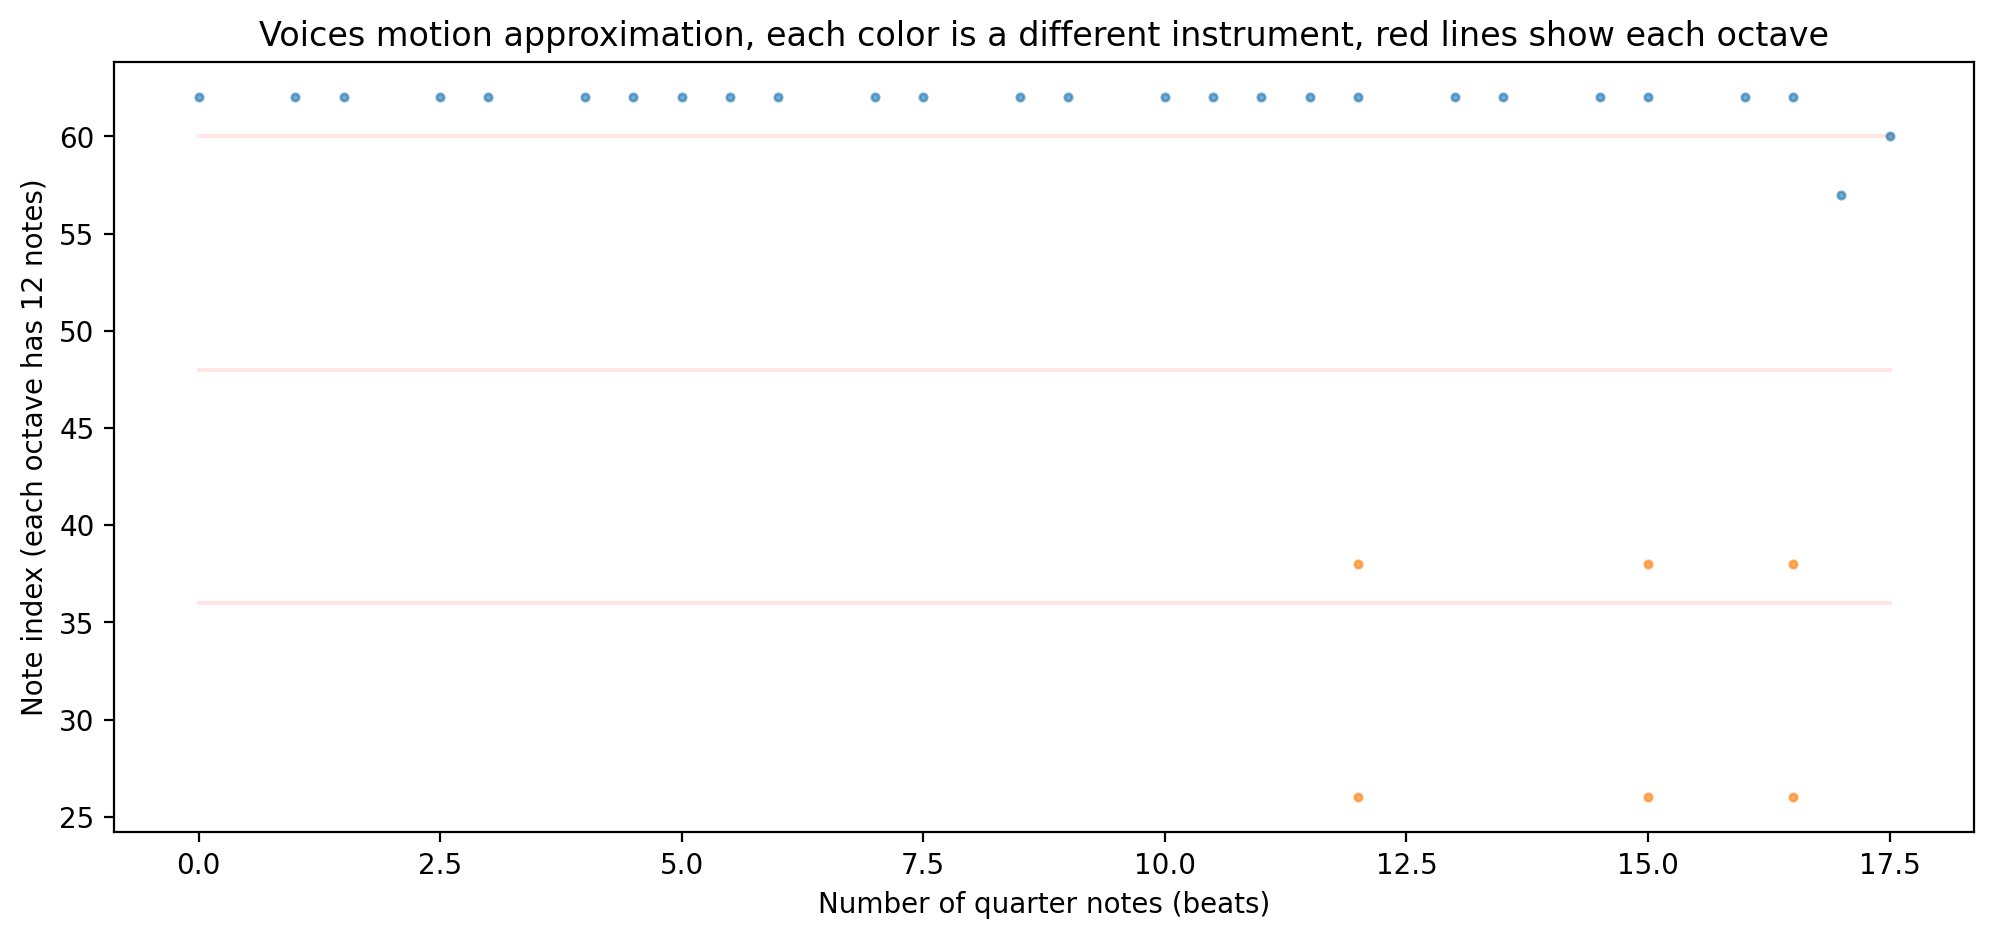

In [51]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def extract_notes(midi_part):
    parent_element = []
    ret = []
    for nt in midi_part.flat.notes:        
        if isinstance(nt, note.Note):
            ret.append(max(0.0, nt.pitch.ps))
            parent_element.append(nt)
        elif isinstance(nt, chord.Chord):
            for pitch in nt.pitches:
                ret.append(max(0.0, pitch.ps))
                parent_element.append(nt)
                
    return ret, parent_element

def print_parts_countour(midi):
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(1, 1, 1)
    minPitch = pitch.Pitch('C10').ps
    maxPitch = 0
    xMax = 0
    
    # Drawing notes.
    for i in range(len(midi.parts)):
        top = midi.parts[i].flat.notes                  
        y, parent_element = extract_notes(top)
        print("len(ret)", len(y), "len(parent_element)", len(parent_element))
        if (len(y) < 1): continue
            
        x = [n.offset for n in parent_element]
        ax.scatter(x, y, alpha=0.6, s=7)
        
        print("==========> len(x)", len(x), "len(y)", len(y))
        
        aux = min(y)
        if (aux < minPitch): minPitch = aux
            
        aux = max(y)
        if (aux > maxPitch): maxPitch = aux
            
        aux = max(x)
        if (aux > xMax): xMax = aux
    
    for i in range(1, 10):
        linePitch = pitch.Pitch('C{0}'.format(i)).ps
        if (linePitch > minPitch and linePitch < maxPitch):
            ax.add_line(mlines.Line2D([0, xMax], [linePitch, linePitch], color='red', alpha=0.1))            

    plt.ylabel("Note index (each octave has 12 notes)")
    plt.xlabel("Number of quarter notes (beats)")
    plt.title('Voices motion approximation, each color is a different instrument, red lines show each octave')
    plt.show()

# Focusing only on 6 first measures to make it easier to understand.
print_parts_countour(base_midi.measures(0, 6))

In [11]:
from difflib import SequenceMatcher
#get content of each midi file

midi_1 = open_midi(concat_path("midi_data", "z_Pirates of the Caribbean - He's a Pirate.mid"), True)
midi_2 = open_midi(concat_path("midi_data", "jesu1.mid"), True)

#compare them with sequence matcher
m = SequenceMatcher(None, midi_1, midi_2)
print(m.ratio()) #your percentage

0.0


In [13]:
midi_1 = open_midi(concat_path("midi_data", "jesu1.mid"), True)
midi_2 = open_midi(concat_path("midi_data", "jesu1.mid"), True)

#compare them with sequence matcher
m = SequenceMatcher(None, midi_1, midi_2)
print(m.ratio()) #your percentage

0.0


In [20]:

    import mido
    import editdistance
        
    def manhattan_distance(list1, list2):
        distance = 0
        for sub1, sub2 in zip(list1, list2):
            sub_distance = 0
            for x, y in zip(sub1, sub2):
                sub_distance += abs(x - y)
            distance += sub_distance
        return distance
    
    def compare_midi_files2(file1, file2):
        # Load midi files
        mid1 = mido.MidiFile(file1)
        mid2 = mido.MidiFile(file2)
    
        # Extract notes from midi files and group adjacent pitches together
        notes1 = []
        for msg in mido.merge_tracks(mid1.tracks):
            if 'note_on' in msg.type:
                pitch = msg.note
                if notes1 and pitch == notes1[-1][-1] + 1:
                    # Append pitch to last group
                    notes1[-1].append(pitch)
                else:
                    # Create new group for pitch
                    notes1.append([pitch])
    
        notes2 = []
        for msg in mido.merge_tracks(mid2.tracks):
            if 'note_on' in msg.type:
                pitch = msg.note
                if notes2 and pitch == notes2[-1][-1] + 1:
                    # Append pitch to last group
                    notes2[-1].append(pitch)
                else:
                    # Create new group for pitch
                    notes2.append([pitch])
    
        # Calculate similarity for each group of pitches
        similarity_scores = []
        return manhattan_distance(notes1, notes2)

    original_file_path = 'midi_data/jesu1.mid'
    generated_file_path = 'midi_data/jesu2.mid'
    
    similarity = compare_midi_files2(original_file_path,generated_file_path)
    
    print(similarity) # higher it is, the less similar files are
    
    

22101


In [14]:
print(midi_1)
print(midi_2)

<music21.stream.Score 0x2465fad0248>
<music21.stream.Score 0x24662284b08>


In [16]:
pip install editdistance

Note: you may need to restart the kernel to use updated packages.
